### 1. 데이터 로드 및 구조 확인

In [1]:
import seaborn as sns 
iris = sns.load_dataset('iris')

### 2. 기술통계량

In [63]:
for species in iris["species"].unique():
    print(f"종: {species}")

    petal_length = iris[iris["species"] == species]["petal_length"]

    # 1. 평균
    print(f"    평균: {petal_length.mean()}")

    # 2. 개수 
    print(f"    개수: {petal_length.count()}")

    # 3. 표준편차
    print(f"    표준편차: {petal_length.std()}")

    # 4. 최소/최대
    print(f"    최소: {petal_length.min()}")
    print(f"    최대: {petal_length.max()}")

    # 5. 사분위수
    Q1: float = petal_length.quantile(.25)
    Q2: float = petal_length.quantile(.5)
    Q3: float = petal_length.quantile(.75)
    print(f"    사분위수")
    print(f"        Q1: {Q1}")
    print(f"        Q2: {Q2}")
    print(f"        Q3: {Q3}")

    print("")

종: setosa
    평균: 1.4620000000000002
    개수: 50
    표준편차: 0.17366399648018407
    최소: 1.0
    최대: 1.9
    사분위수
        Q1: 1.4
        Q2: 1.5
        Q3: 1.5750000000000002

종: versicolor
    평균: 4.26
    개수: 50
    표준편차: 0.46991097723995795
    최소: 3.0
    최대: 5.1
    사분위수
        Q1: 4.0
        Q2: 4.35
        Q3: 4.6

종: virginica
    평균: 5.5520000000000005
    개수: 50
    표준편차: 0.5518946956639834
    최소: 4.5
    최대: 6.9
    사분위수
        Q1: 5.1
        Q2: 5.55
        Q3: 5.875



### 3. 시각화

<Axes: xlabel='species', ylabel='petal_length'>

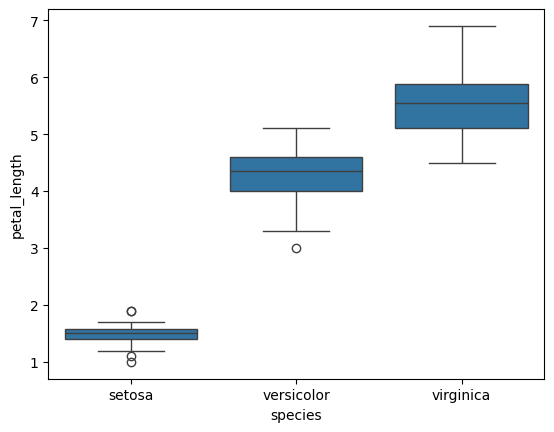

In [ ]:
# Boxplot으로 Petal Length 시각화하기 

sns.boxplot(data=iris, x="species", y="petal_length")

해석
- setosa, versicolor, verginica 순으로 petal_length가 크다.
- setosa, versicolor, verginica 순으로 범위가 넓다.

### 4. 정규성 검정 (Shapiro-Wilk)

In [57]:
import scipy 

print("Shapiro-Wilk 검정")
for species in iris["species"].unique():
    petal_length = iris[iris["species"] == species]["petal_length"]
    print(f"종: {species}")
    pvalue = scipy.stats.shapiro(petal_length).pvalue
    print(f"p-value: {pvalue}")

Shapiro-Wilk 검정
종: setosa
p-value: 0.0548114671955363
종: versicolor
p-value: 0.15847783815657573
종: virginica
p-value: 0.10977536903223506


귀무가설: 데이터가 정규분포를 따른다 <br>
대립가설: 데이터가 정규분포를 따르지 않는다 <br><br>
setosa: p-value = 0.0548.. <br>
: p-value가 0.05 이상이므로 귀무가설을 채택한다 (정규 분포를 따른다) <br><br>
versicolor: p-value = 0.1584... <br>
: p-value가 0.05 이상이므로 귀무가설을 채택한다 (정규 분포를 따른다) <br><br>
verginica: p-value = 0.1097... <br>
: p-value가 0.05 이상이므로 귀무가설을 채택한다 (정규 분포를 따른다) <br><br>

### 5. 등분산성 검정 (Levene)

In [58]:
data = []
for species in iris["species"].unique():
    data.append(
        iris[iris["species"] == species]["petal_length"]
    )
pvalue = float(scipy.stats.levene(*data).pvalue)
print("Levene 검정")
print(f"p-value : {pvalue}")

Levene 검정
p-value : 3.1287566394085397e-08


3개 그룹의 Levene 검정 p-value가 유의수준보다 작으므로, 종별 petal_length 분산이 같다고 보기 어렵다.

### 6. ANOVA 가설 수립

H0 (귀무가설): 세 species 간 petal_length의 모평균은 모두 같다. <br>
H1 (대립가설): 적어도 한 species의 모평균은 같지 않다.

### 7. One-way ANOVA

In [59]:
fvalue, pvalue = scipy.stats.f_oneway(*data)
print("One-way ANOVA")
print(f"f-value: {fvalue}")
print(f"p-value: {pvalue}")

One-way ANOVA
f-value: 1180.1611822529785
p-value: 2.8567766109619814e-91


p-value 값이 유의수준 0.05보다 작으므로 귀무가설은 기각된다. (적어도 한 species의 모평균은 같지 않다)

### 8. 사후검정 (Tukey HSD)

In [62]:
species_id = {}
for idx, species in enumerate(iris["species"].unique()):
    species_id[idx] = species
    print(f"{idx}: {species}")
print(scipy.stats.tukey_hsd(*data))

0: setosa
1: versicolor
2: virginica
Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -2.798     0.000    -3.002    -2.594
 (0 - 2)     -4.090     0.000    -4.294    -3.886
 (1 - 0)      2.798     0.000     2.594     3.002
 (1 - 2)     -1.292     0.000    -1.496    -1.088
 (2 - 0)      4.090     0.000     3.886     4.294
 (2 - 1)      1.292     0.000     1.088     1.496



### 9. 결과 요약

Boxplot을 토대로, setosa < versicolor < verginica 순서로 Petal_Length가 더 크게 나타났다. <br>
ANOVA 검정 결과 3개 종의 평균이 전부 같지는 않다는 결과를 얻을 수 있었다. <br>
Tukey HSD 검정을 통해 setosa < versicolor < verginica 순서로 모평균 추정치가 증가함을 알 수 있었다. <br>

### 10. 회귀 분석

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = iris[["sepal_length", "sepal_width", "petal_width"]]
Y = iris["petal_length"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2
)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

coef = pd.Series(model.coef_, index=X.columns)

print(f"mse: {mse}")
print(f"R2: {r2}")
print(f"coef:\n{coef}")


mse: 0.10872952114816878
R2: 0.9715242677751567
coef:
sepal_length    0.668296
sepal_width    -0.612292
petal_width     1.497339
dtype: float64


mse가 0.1 이하, R2가 0.97 이상으로 선형 회귀식이 각 변수 간의 관계를 잘 나타낸다고 해석할 수 있다.